In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
#Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')


In [12]:
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN


In [39]:
# check all values in Churned colum is 0 or 1
df.loc[(df['Churned'] != 0) & (df['Churned'] != 1)]

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Subscription_Duration


In [18]:
# Check whether there's any missing Date_of_Churn data for Churned==1 rows
unchurned_items = df.loc[df['Churned'] == 0]
unchurned_items.loc[unchurned_items['Date_of_Churn'] == None]

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn


In [19]:
# Check whether there's any missing Reason_for_Churn data for Churned==1 rows
unchurned_items = df.loc[df['Churned'] == 0]
unchurned_items.loc[unchurned_items['Reason_for_Churn'] == None]

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn


In [24]:
# Convert date columns to datetime
df['Subscription_Start_Date'] = pd.to_datetime(df['Subscription_Start_Date'])
df['Date_of_Churn'] = pd.to_datetime(df['Date_of_Churn'])

In [25]:
# Add column for subscription duration
df['Subscription_Duration'] = (df['Date_of_Churn'] - df['Subscription_Start_Date'])

In [28]:
df.loc[df['Churned'] == 1]

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Subscription_Duration
12,13,41,Other,North,2021-04-22 01:53:37.657108,Standard,14.99,Direct Debit,14.011035,Sci-Fi,Mobile,0.152133,1059,5,1,2021-06-13 01:53:37.657108,Found better service,52 days
13,14,70,Other,South,2020-10-29 01:53:37.657119,Standard,14.99,Direct Debit,35.339461,Sci-Fi,Mobile,3.346005,1011,2,1,2021-03-11 01:53:37.657119,Found better service,133 days
14,15,53,Other,East,2023-10-06 01:53:37.657130,Standard,14.99,Credit Card,14.191293,Documentary,Mobile,2.791956,1020,1,1,2024-07-02 01:53:37.657130,Price increase,270 days
16,17,41,Other,South,2019-07-27 01:53:37.657151,Premium,19.99,Credit Card,12.991876,Drama,Mobile,2.519855,1043,1,1,2020-03-16 01:53:37.657151,Found better service,233 days
29,30,39,Male,North,2019-11-05 01:53:37.657296,Standard,14.99,Credit Card,22.258651,Comedy,Mobile,0.838116,1034,2,1,2020-08-13 01:53:37.657296,Price increase,282 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,984,26,Male,Central,2021-10-06 01:53:37.667748,Basic,9.99,Direct Debit,5.586560,Sci-Fi,PC,3.773253,1025,5,1,2022-05-30 01:53:37.667748,Found better service,236 days
991,992,34,Female,Central,2019-10-04 01:53:37.667839,Standard,14.99,PayPal,13.864300,Drama,PC,0.500756,1003,3,1,2019-11-09 01:53:37.667839,Personal reasons,36 days
992,993,43,Female,East,2021-01-26 01:53:37.667850,Premium,19.99,Credit Card,2.735002,Action,Mobile,0.070838,1099,1,1,2021-10-24 01:53:37.667850,Personal reasons,271 days
995,996,25,Other,East,2020-10-26 01:53:37.667884,Basic,9.99,PayPal,0.700179,Documentary,Mobile,3.310731,1035,1,1,2021-03-14 01:53:37.667884,Found better service,139 days


In [43]:
#
df.iloc[:,-1].describe()


count                            246
mean     195 days 08:35:07.317073170
std       95 days 11:36:35.306355338
min                 30 days 00:00:00
25%                115 days 00:00:00
50%                201 days 00:00:00
75%                276 days 18:00:00
max                364 days 00:00:00
Name: Subscription_Duration, dtype: object

In [ ]:
#Duration vs. monthly hours

In [46]:
# Calculate overall churn rate
overall_churn_rate = df['Churned'].mean()
print("Overall Churn Rate:", overall_churn_rate)


Overall Churn Rate: 0.246


In [48]:
# Calculate churn rate by subscription type
churn_rate_by_type = df.groupby('Subscription_Type')['Churned'].mean()
print(churn_rate_by_type)

Subscription_Type
Basic       0.264493
Premium     0.252577
Standard    0.233962
Name: Churned, dtype: float64


In [50]:
age_distribution = df['Age'].describe()

print("Age Distribution:")
print(age_distribution)

Age Distribution:
count    1000.000000
mean       44.385000
std        15.321669
min        18.000000
25%        31.750000
50%        45.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64


In [110]:
# Calculate churn rate by age
churn_rate_by_age = df.groupby('Age')['Churned'].mean().to_frame('Mean')
print(churn_rate_by_age)

         Mean
Age          
18   0.291667
19   0.300000
20   0.200000
21   0.333333
22   0.173913
23   0.266667
24   0.230769
25   0.190476
26   0.352941
27   0.428571
28   0.250000
29   0.380952
30   0.187500
31   0.133333
32   0.133333
33   0.238095
34   0.300000
35   0.357143
36   0.444444
37   0.571429
38   0.333333
39   0.444444
40   0.095238
41   0.363636
42   0.238095
43   0.269231
44   0.312500
45   0.111111
46   0.105263
47   0.166667
48   0.307692
49   0.120000
50   0.111111
51   0.312500
52   0.222222
53   0.350000
54   0.045455
55   0.307692
56   0.173913
57   0.133333
58   0.187500
59   0.312500
60   0.000000
61   0.315789
62   0.150000
63   0.250000
64   0.200000
65   0.380952
66   0.192308
67   0.250000
68   0.380952
69   0.285714
70   0.130435


<Axes: xlabel='Age', ylabel='Mean'>

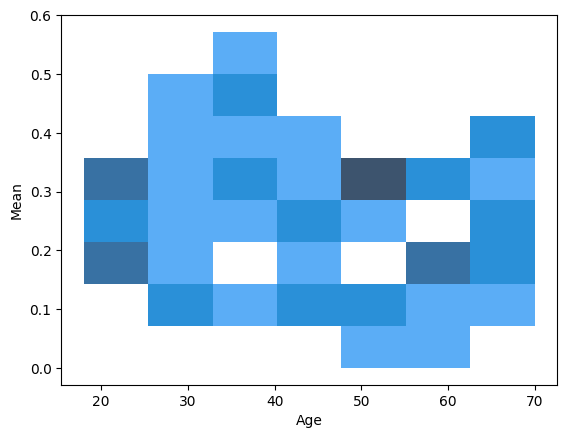

In [141]:
#graph
sns.histplot(churn_rate_by_age, x='Age', y='Mean')
# sns.pairplot(churn_rate_by_age)


In [51]:
location_distribution = df['Location'].value_counts()
print("\nLocation Distribution:")
print(location_distribution)


Location Distribution:
Location
West       216
North      204
Central    201
East       200
South      179
Name: count, dtype: int64


In [56]:
# Calculate churn rate by location
churn_rate_by_location = df.groupby('Location')['Churned'].mean()
print(churn_rate_by_location)

Location
Central    0.233831
East       0.300000
North      0.259804
South      0.234637
West       0.203704
Name: Churned, dtype: float64


In [155]:
# Check whether the price for different locations is the same
df.groupby(['Location', 'Subscription_Type'])['Monthly_Payment'].describe()

count   mean           std    min    25%    50%  \
Location Subscription_Type                                                    
Central  Basic               61.0   9.99  1.791099e-15   9.99   9.99   9.99   
         Premium             41.0  19.99  0.000000e+00  19.99  19.99  19.99   
         Standard            99.0  14.99  1.785397e-15  14.99  14.99  14.99   
East     Basic               42.0   9.99  0.000000e+00   9.99   9.99   9.99   
         Premium             44.0  19.99  0.000000e+00  19.99  19.99  19.99   
         Standard           114.0  14.99  3.568399e-15  14.99  14.99  14.99   
North    Basic               56.0   9.99  0.000000e+00   9.99   9.99   9.99   
         Premium             39.0  19.99  3.599156e-15  19.99  19.99  19.99   
         Standard           109.0  14.99  1.784562e-15  14.99  14.99  14.99   
South    Basic               58.0   9.99  1.791871e-15   9.99   9.99   9.99   
         Premium             27.0  19.99  3.620390e-15  19.99  19.99  19.99   
         Standard            94.0  14.99  1.785882e-15  14.99  14.99  14.99   
West     Basic               59.0   9.99  1.791605e-15   9.99   9.99   9.99   
         Premium             43.0  19.99  0.000000e+00  19.99  19.99  19.99   
         Standard           114.0  14.99  3.568399e-15  14.99  14.99  14.99   

                              75%    max  
Location Subscription_Type                
Central  Basic               9.99   9.99  
         Premium            19.99  19.99  
         Standard           14.99  14.99  
East     Basic               9.99   9.99  
         Premium            19.99  19.99  
         Standard           14.99  14.99  
North    Basic               9.99   9.99  
         Premium            19.99  19.99  
         Standard           14.99  14.99  
South    Basic               9.99   9.99  
         Premium            19.99  19.99  
         Standard           14.99  14.99  
West     Basic               9.99   9.99  
         Premium            19.99  19.99  
         Standard           14.99  14.99

In [52]:
gender_distribution = df['Gender'].value_counts()
print("\nGender Distribution:")
print(gender_distribution)



Gender Distribution:
Gender
Other     336
Male      334
Female    330
Name: count, dtype: int64


In [58]:
# Calculate churn rate by gender
churn_rate_by_gender = df.groupby('Gender')['Churned'].mean()
print(churn_rate_by_gender)

Gender
Female    0.257576
Male      0.224551
Other     0.255952
Name: Churned, dtype: float64


In [60]:
# Calculate churn rate by rating given
churn_rate_by_rating = df.groupby('Rating_Given')['Churned'].mean()
print(churn_rate_by_rating)

Rating_Given
1    0.303665
2    0.330189
3    0.309783
4    0.178218
5    0.118483
Name: Churned, dtype: float64


In [78]:
# Calculate rating by gender
rating_by_gender = df.groupby('Gender')['Rating_Given'].describe()
print(rating_by_gender)

        count      mean       std  min  25%  50%  75%  max
Gender                                                    
Female  330.0  2.960606  1.375522  1.0  2.0  3.0  4.0  5.0
Male    334.0  3.077844  1.428975  1.0  2.0  3.0  4.0  5.0
Other   336.0  3.050595  1.462098  1.0  2.0  3.0  4.0  5.0


In [79]:
# 
rating_by_genre = df.groupby('Favorite_Genre')['Rating_Given'].describe()
print(rating_by_genre)

                count      mean       std  min  25%  50%  75%  max
Favorite_Genre                                                    
Action          205.0  3.029268  1.474995  1.0  2.0  3.0  4.0  5.0
Comedy          203.0  3.142857  1.394574  1.0  2.0  3.0  4.0  5.0
Documentary     188.0  2.925532  1.362126  1.0  2.0  3.0  4.0  5.0
Drama           212.0  3.084906  1.438258  1.0  2.0  3.0  4.0  5.0
Sci-Fi          192.0  2.953125  1.437308  1.0  2.0  3.0  4.0  5.0


In [145]:
df.loc[df['Churned'] == 1].groupby('Favorite_Genre')['Rating_Given'].describe()

,count,mean,std,min,25%,50%,75%,max
Favorite_Genre,,,,,,,,
Action,49.0,2.489796,1.371168,1.0,1.0,2.0,3.0,5.0
Comedy,49.0,2.612245,1.271750,1.0,2.0,2.0,3.0,5.0
Documentary,52.0,2.576923,1.143544,1.0,2.0,3.0,3.0,5.0
Drama,47.0,2.659574,1.323313,1.0,2.0,2.0,4.0,5.0
Sci-Fi,49.0,2.632653,1.302144,1.0,2.0,3.0,4.0,5.0


In [146]:
# Average rating for Churned subscribers
df.loc[(df['Churned'] == 1) & (df['Reason_for_Churn'] == 'Dissatisfied with content')].groupby('Favorite_Genre')['Rating_Given'].describe()

,count,mean,std,min,25%,50%,75%,max
Favorite_Genre,,,,,,,,
Action,12.0,2.583333,1.311372,1.0,1.75,2.5,3.25,5.0
Comedy,11.0,3.181818,1.401298,1.0,2.50,3.0,4.00,5.0
Documentary,5.0,3.400000,1.140175,2.0,3.00,3.0,4.00,5.0
Drama,11.0,2.545455,1.293340,1.0,2.00,2.0,3.50,5.0
Sci-Fi,13.0,2.615385,1.192928,1.0,2.00,2.0,3.00,5.0


In [82]:
# Analyze monthly hours watched, session lengths, and rating given
hours_watched = df['Monthly_Hours_Watched'].describe()
print(hours_watched)


Monthly Hours Watched:
count    1000.000000
mean       19.071653
std        19.279140
min         0.041574
25%         5.490739
50%        13.361219
75%        26.471636
max       139.170408
Name: Monthly_Hours_Watched, dtype: float64


In [151]:
df.loc[df['Churned'] == 1]['Monthly_Hours_Watched'].describe()

count    246.000000
mean      17.039672
std       17.236483
min        0.041574
25%        5.105890
50%       11.948593
75%       23.618435
max      108.122364
Name: Monthly_Hours_Watched, dtype: float64

In [152]:
df.loc[(df['Churned'] == 1) & (df['Reason_for_Churn'] == 'Found better service')]['Monthly_Hours_Watched'].describe()

count     64.000000
mean      19.552152
std       20.103876
min        0.041574
25%        5.356559
50%       13.957816
75%       26.386618
max      108.122364
Name: Monthly_Hours_Watched, dtype: float64

In [153]:
df.loc[(df['Churned'] == 1) & (df['Reason_for_Churn'] == 'Price increase')]['Monthly_Hours_Watched'].describe()

count     68.000000
mean      17.797802
std       17.990171
min        0.191784
25%        5.193524
50%       13.896114
75%       23.603935
max      100.009333
Name: Monthly_Hours_Watched, dtype: float64

In [147]:
session_length = df['Average_Session_Length'].describe()
print(session_length)

count    1000.000000
mean        1.893771
std         1.868852
min         0.000486
25%         0.548918
50%         1.271808
75%         2.623575
max        11.417557
Name: Average_Session_Length, dtype: float64


In [149]:
session_length = df.loc[df['Churned'] == 1]['Average_Session_Length'].describe()
print(session_length)


count    246.000000
mean       1.920114
std        1.841691
min        0.000821
25%        0.641881
50%        1.277379
75%        2.704228
max       11.417557
Name: Average_Session_Length, dtype: float64


In [150]:
df.loc[(df['Churned'] == 1) & (df['Reason_for_Churn'] == 'Found better service')]['Average_Session_Length'].describe()

count    64.000000
mean      2.054326
std       1.812509
min       0.004700
25%       0.625091
50%       1.527933
75%       3.046879
max       7.167577
Name: Average_Session_Length, dtype: float64

In [158]:
df.groupby(['Reason_for_Churn', 'Subscription_Type'])['Subscription_Type'].describe()

count unique       top freq
Reason_for_Churn          Subscription_Type                            
Dissatisfied with content Basic                21      1     Basic   21
                          Premium               8      1   Premium    8
                          Standard             23      1  Standard   23
Found better service      Basic                16      1     Basic   16
                          Premium              11      1   Premium   11
                          Standard             37      1  Standard   37
Personal reasons          Basic                21      1     Basic   21
                          Premium              12      1   Premium   12
                          Standard             29      1  Standard   29
Price increase            Basic                15      1     Basic   15
                          Premium              18      1   Premium   18
                          Standard             35      1  Standard   35